In [47]:
import pandas as pd
import matplotlib
import seaborn as sns

In [17]:
data = pd.read_csv('Pokemon.csv',index_col='#')

In [18]:
data.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                              
1              Bulbasaur  Grass  Poison    318  45      49       49       65   
2                Ivysaur  Grass  Poison    405  60      62       63       80   
3               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
#                                         
1       65     45           1      False  
2       80     60           1      False  
3      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

In [20]:
type(data['Name'])

pandas.core.series.Series

### Comparando columnas

In [24]:
data.Name == data['Name']
(data.Name == data['Name']).all()

True

### Obteniendo el valor Máximo y Minimo de una columna

In [29]:
dir(data['Total']) #muestra las funciones
data['Total'].max()
data['Total'].min()


180

### Obteniendo los Nombres de los pokemon con total máximo

In [32]:
total_max = data['Total'].max()
data[data['Total'] == total_max].Name

#
150      MewtwoMega Mewtwo X
150      MewtwoMega Mewtwo Y
384    RayquazaMega Rayquaza
Name: Name, dtype: object

### Calculando el promedio

In [33]:
data['Speed'].mean()

68.2775

### ¿Cómo se comportan los datos de la columna 'Attack'?

In [35]:
%matplotlib inline

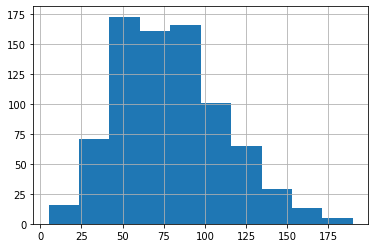

In [36]:
data['Attack'].hist()

In [39]:
data['Attack'].min()
data['Attack'].max()

190

### ¿Cuántos de cada tipo tenemos?

In [41]:
data['Type 1'].value_counts()
data['Type 2'].value_counts()


Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ice         14
Rock        14
Ghost       14
Water       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

### Calculando el total promedio de cada tipo

In [44]:
data.groupby('Type 1')['Total'].mean().sort_values(ascending=False)
data.groupby('Type 2')['Total'].mean().sort_values(ascending=False)

Type 1
Dragon      550.531250
Steel       487.703704
Flying      485.000000
Psychic     475.947368
Fire        458.076923
Rock        453.750000
Dark        445.741935
Electric    443.409091
Ghost       439.562500
Ground      437.500000
Ice         433.458333
Water       430.455357
Grass       421.142857
Fighting    416.444444
Fairy       413.176471
Normal      401.683673
Poison      399.142857
Bug         378.927536
Name: Total, dtype: float64

### ¿Cuál es el "Attack" máximo de cada combinación "Type 1" y "Type 2"?

In [45]:
data.groupby(['Type 1','Type 2'])['Attack'].max().sort_values(ascending=False)

Type 1    Type 2  
Psychic   Fighting    190
Bug       Fighting    185
Ground    Fire        180
Dragon    Flying      180
          Ice         170
                     ... 
Water     Fairy        50
Ice       Psychic      50
Fairy     Flying       50
Electric  Ghost        50
Bug       Water        30
Name: Attack, Length: 136, dtype: int64

### Visualizando una columna contra otra

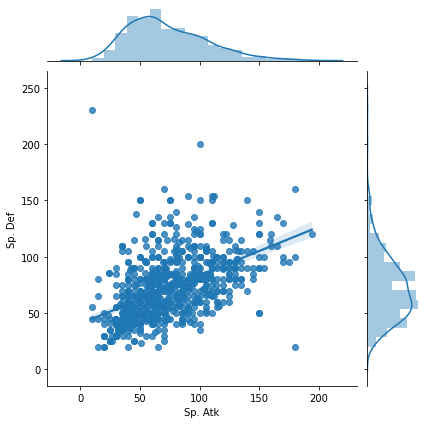

In [49]:
sns.jointplot( x='Sp. Atk',y='Sp. Def', data=data, kind='reg' )

### Crear un boxplot de las columnas que nos importan

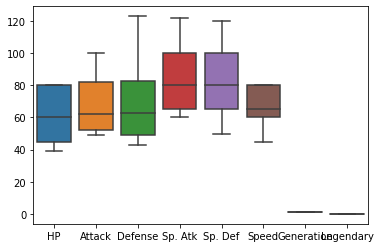

In [50]:
sns.boxplot( data = data.drop(['Name','Total'],axis=1).head() )